## Import libraries and load Titanic Dataset

In [45]:
import pandas as pd
import numpy as np
#% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [46]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Drop PassengerID,Name,Ticket,Cabin as they won't help much in prediction

In [48]:
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Check for any null values so that we can fix them

In [49]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

## We can see Age and Embarked has null values
## Find no of missing values in each column

In [50]:
missing = df.isnull()
missing.columns.values.tolist()
for data in missing.columns.values.tolist():
    print(data)
    print(missing[data].value_counts())

Survived
False    891
Name: Survived, dtype: int64
Pclass
False    891
Name: Pclass, dtype: int64
Sex
False    891
Name: Sex, dtype: int64
Age
False    714
True     177
Name: Age, dtype: int64
SibSp
False    891
Name: SibSp, dtype: int64
Parch
False    891
Name: Parch, dtype: int64
Fare
False    891
Name: Fare, dtype: int64
Embarked
False    889
True       2
Name: Embarked, dtype: int64


## Fill missing values in Age column with mean value

In [51]:
avg_age = df['Age'].astype("float").mean(axis=0)    
import math
avg_age = math.floor(avg_age)
avg_age
df['Age'].replace(np.nan,avg_age,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## For Categorical variable we fill the mode i.e more frequent data

In [52]:
df['Embarked'].value_counts().idxmax()

'S'

In [53]:
#We can see that S is more Frequent so we replace missing values in Embarked with S
df['Embarked'].replace(np.nan,'S',inplace=True)

## Check again for null values

In [54]:
df.isnull().any()
#no null values now

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

## Let's find correlation between different colums

In [55]:
df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000


## First we need to encode categorical variables and scale Age and Fare

In [56]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Embarked']=LE.fit_transform(df['Embarked'])
df['Sex']=LE.fit_transform(df['Sex'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp = df['Age']
temp=temp.values.reshape(-1,1)
temp= scaler.fit_transform(temp)
temp
df['Age']=temp

#standardize Fare
temp1 = df['Fare']
temp1 = temp1.values.reshape(-1,1)
temp1 =scaler.fit_transform(temp1)
df['Fare']=temp1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.581659,1,0,-0.502445,2
1,1,1,0,0.649327,1,0,0.786845,0
2,1,3,0,-0.273913,0,0,-0.488854,2
3,1,1,0,0.418517,1,0,0.420730,2
4,0,3,1,0.418517,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.196976,0,0,-0.386671,2
887,1,1,0,-0.812469,0,0,-0.044381,2
888,0,3,0,-0.043103,1,2,-0.176263,2
889,1,1,1,-0.273913,0,0,-0.044381,0


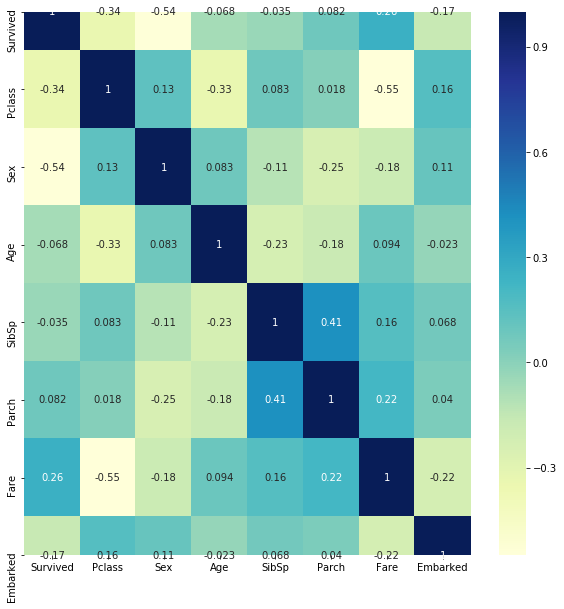

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),xticklabels=df.columns.values,yticklabels=df.columns.values,annot=True, cmap="YlGnBu")
#Darker the colour better the correlation

## Now let's analyze by plotting countplot of each feature with dependent variable

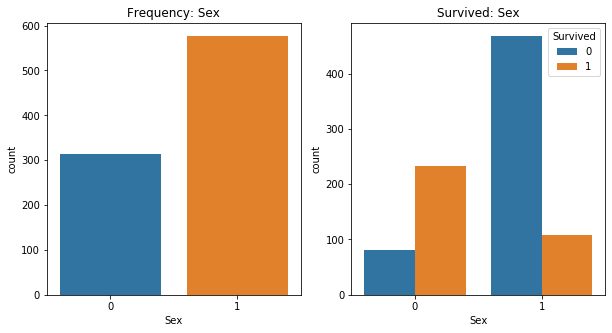

In [58]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['Sex'], data=df, ax=ax[0])
sns.countplot(df['Sex'], hue='Survived', data=df, ax=ax[1])
ax[0].title.set_text("Frequency: Sex")
ax[1].title.set_text("Survived: Sex")

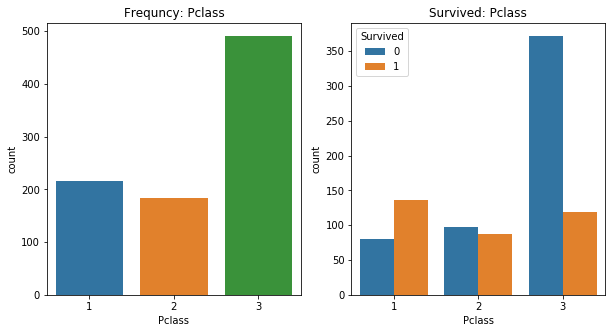

In [59]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['Pclass'], data=df, ax=ax[0])
sns.countplot(df['Pclass'], hue='Survived', data=df, ax=ax[1])
ax[0].title.set_text("Frequncy: Pclass")
ax[1].title.set_text("Survived: Pclass")

## For plotting Age we can convert age into 3 bins a old,middle and young

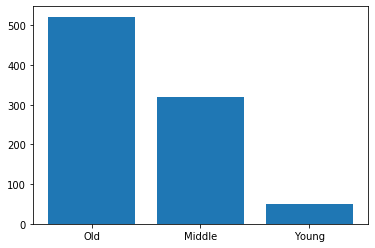

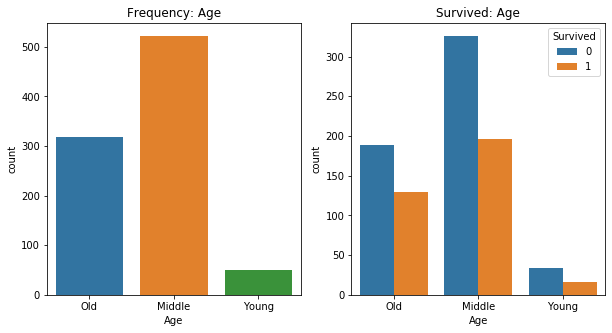

In [60]:
bins = np.linspace(min(df["Age"]), max(df["Age"]), 4)
bins
groups = ["Old","Middle","Young"]
temp= pd.cut(df['Age'],bins,labels = groups,include_lowest=True) 
temp.value_counts()
plt.bar(groups,temp.value_counts())
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(temp, data=df, ax=ax[0])
sns.countplot(temp, hue='Survived', data=df, ax=ax[1])
ax[0].title.set_text("Frequency: Age")
ax[1].title.set_text("Survived: Age")

# similarly, we can do this for Fare

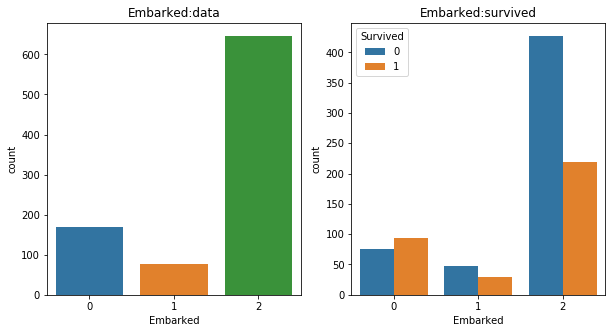

In [61]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(df['Embarked'],data=df,ax=ax[0])
sns.countplot(df['Embarked'],hue='Survived',data=df,ax=ax[1])
ax[0].title.set_text("Embarked:data")
ax[1].title.set_text("Embarked:survived")

## Split the data into x(features) and y(dependent variables) and then split into training and testing sets

In [62]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

## Now let's build models using different algorithms

# 1. Support Vector Machine

In [67]:
from sklearn.svm import SVC
svm_classifier =SVC(kernel='linear',random_state=0)
svm_classifier.fit(x_train,y_train)

svm_pred=svm_classifier.predict(x_test)
svm_pred

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
cm = confusion_matrix(y_test,svm_pred)
print('confusing matrix:\n',cm)


confusing matrix:
 [[45  6]
 [12 27]]


In [69]:
score = accuracy_score(y_test,svm_pred)
print('support Vector Machine Accuracy: ',score)

support Vector Machine Accuracy:  0.8


## 2. Logistic Regression Accuracy

In [70]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(x_train,y_train)
log_pred=log_classifier.predict(x_test)
log_pred
cm =confusion_matrix(y_test,log_pred)
print('confusing matrix:\n',cm)

confusing matrix:
 [[43  8]
 [11 28]]


C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
score= accuracy_score(y_test,log_pred)
print('Logistic Regression Accuracy: ',score)

Logistic Regression Accuracy:  0.7888888888888889


## 3. Naive Bayes Accuracy

In [73]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(x_train,y_train)
naive_pred=naive_classifier.predict(x_test)
naive_pred
cm = confusion_matrix(y_test,naive_pred)
print('confusing matrix:\n',cm)

confusing matrix:
 [[42  9]
 [ 8 31]]


In [74]:
score= accuracy_score(y_test,naive_pred)
print('Naive Bayes Accuracy: ',score)

Naive Bayes Accuracy:  0.8111111111111111


## 4. Random Forest Accuracy

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=120 ,criterion='gini',random_state=0)
random_classifier.fit(x_train,y_train)
rand_pred=random_classifier.predict(x_test)
rand_pred
cm = confusion_matrix(y_test,rand_pred)
print('confusing matrix:\n',cm)

confusing matrix:
 [[46  5]
 [12 27]]


In [76]:
score= accuracy_score(y_test,rand_pred)
print("Random forest Accuracy: ",score)

Random forest Accuracy:  0.8111111111111111


## KNN Accuracy

In [77]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
k_classifier.fit(x_train,y_train)
k_pred=k_classifier.predict(x_test)
k_pred

cm =confusion_matrix(y_test,k_pred)
print('confusing matrix:\n',cm)

confusing matrix:
 [[46  5]
 [14 25]]


In [78]:
score = accuracy_score(y_test,k_pred)
print('KNN Accuracy: ',score)

KNN Accuracy:  0.7888888888888889
